# Rotating Coild Data Analysis for SI Q14 Magnets

## Import libraries and Load measurement data

In [ ]:
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')

%matplotlib notebook

import matplotlib.pyplot as plt
from rotcoil import *

In [ ]:
# Define serial numbers, one for each magnet

serials = [
    '002', '004', '005', '006', '007', '008', '009', 
    '010', '011', '012', '013', '014', '015', '016', '017', '018', '019',
    '020', '021', '023', '024', '025', '026', '027', '028', '029',
    '030', '031', '032', '033', '034', '035', '036', '037', '038', '039',
    '040', '041', '042', '043', '044', '045', '046', '047', '048', '049',
    '050', '051', '052', '053', '054', '055', '056', '057', '058', '059',
    '060', '061', '062', '063', '064', '065', '066', '067', '068', '069',
    '070', '071', '072', '073', '074', '075', '076', '077', '078', '079',
    '080', '081',
]

# Load all data
data = dict()
for i in range(len(serials)):
    sn = serials[i]
    data[sn] = RotCoilMeas_SIQuadQ14(sn)
    print('index: {:02d}, serial_number: {}, data sets: {}'.format(i, sn, data[sn].data_sets))

## Maximum Integrated Quadrupole

<IPython.core.display.Javascript object>


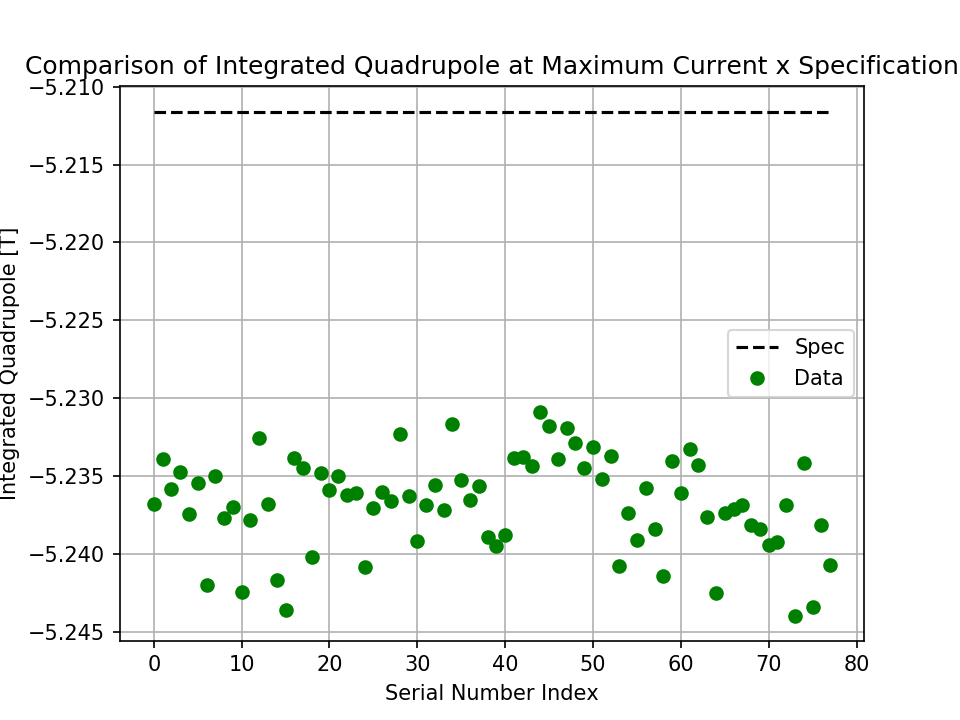

In [3]:
# gets integrated strength at maximum current for all magnets
tmpl = data[serials[0]]
idx = tmpl.get_max_current_index()
max_mpole = []
for i in range(len(serials)):
    d = data[serials[i]]
    mpoles = d.get_intmpole_normal_avg('M1', d.main_harmonic)
    max_mpole.append(mpoles[idx])
    
# plot data comparison with spec
y = (-tmpl.spec_main_intmpole_max_value, ) * 2
plt.plot([0,len(max_mpole)-1], y, '--k')
plt.plot(max_mpole, 'og')
plt.grid()
plt.legend(('Spec','Data'))
plt.xlabel('Serial Number Index')
plt.ylabel('Integrated Quadrupole [T]')
plt.title('Comparison of Integrated Quadrupole at Maximum Current x Specification')
plt.show()

## Magnetic Center

<IPython.core.display.Javascript object>


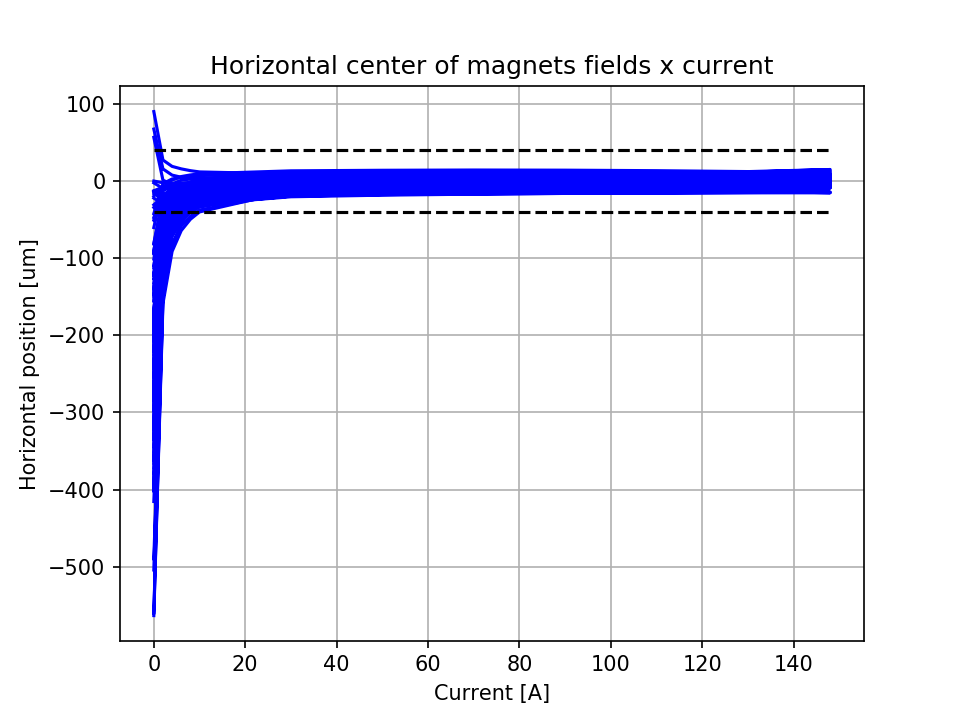

In [4]:
# Horizontal center for all magnets x currents

for i in range(len(serials)):
    c = data[serials[i]].get_currents('M1')
    x = data[serials[i]].get_magnetic_center_x('M1')
    plt.plot(c, x, 'b')

specp = (+tmpl.spec_magnetic_center_x, ) * 2
specn = (-tmpl.spec_magnetic_center_x, ) * 2
plt.plot([min(c),max(c)], specp, '--k')
plt.plot([min(c),max(c)], specn, '--k')
plt.xlabel('Current [A]')
plt.ylabel('Horizontal position [um]')
plt.title('Horizontal center of magnets fields x current')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


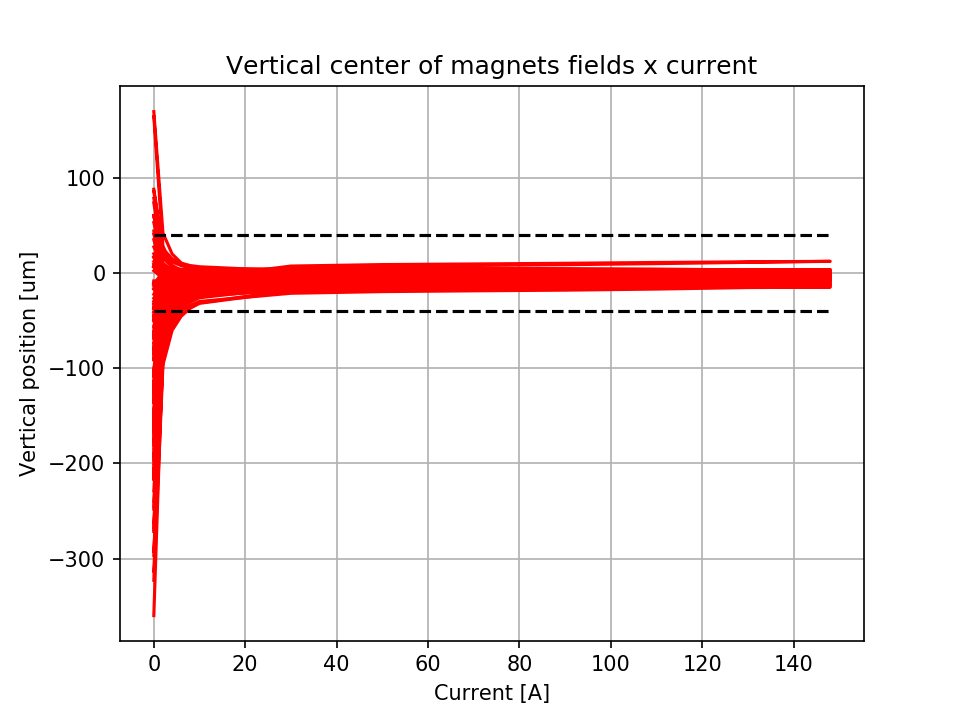

In [5]:
# Vertical center for all magnets y currents

for i in range(len(serials)):
    c = data[serials[i]].get_currents('M1')
    y = data[serials[i]].get_magnetic_center_y('M1')
    plt.plot(c, y, 'r')
specp = (+tmpl.spec_magnetic_center_y, ) * 2
specn = (-tmpl.spec_magnetic_center_y, ) * 2
plt.plot([min(c),max(c)], specp, '--k')
plt.plot([min(c),max(c)], specn, '--k')
plt.xlabel('Current [A]')
plt.ylabel('Vertical position [um]')
plt.title('Vertical center of magnets fields x current')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


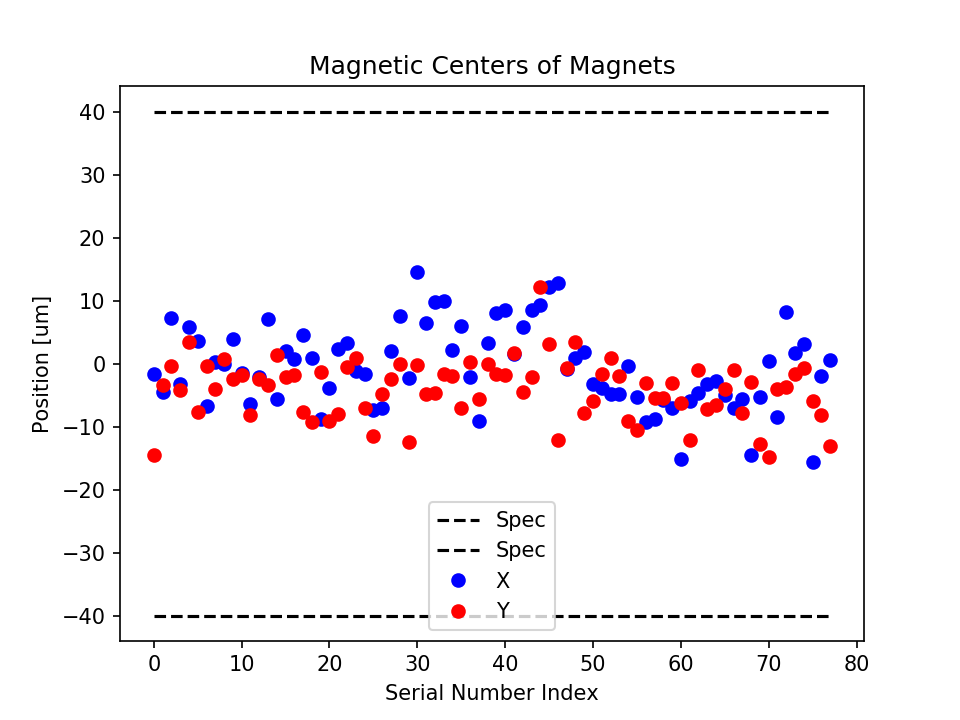

In [6]:
# Horizontal and vertical positions of all magnets

tmpl = data[serials[0]]
xv, yv = [], []
for i in range(len(serials)):
    d = data[serials[i]]
    idx = d.get_max_current_index()
    x = d.get_magnetic_center_x('M1')
    y = d.get_magnetic_center_y('M1')
    xv.append(x[idx])
    yv.append(y[idx])
specp = (+tmpl.spec_magnetic_center_x, ) * 2
specn = (-tmpl.spec_magnetic_center_x, ) * 2
plt.plot([0,len(data)-1], specp, '--k')
plt.plot([0,len(data)-1], specn, '--k')
plt.plot(xv, 'ob')
plt.plot(yv, 'or')
plt.xlabel('Serial Number Index')
plt.ylabel('Position [um]')
plt.legend(('Spec', 'Spec', 'X', 'Y'))
plt.title('Magnetic Centers of Magnets')
plt.show()

<IPython.core.display.Javascript object>


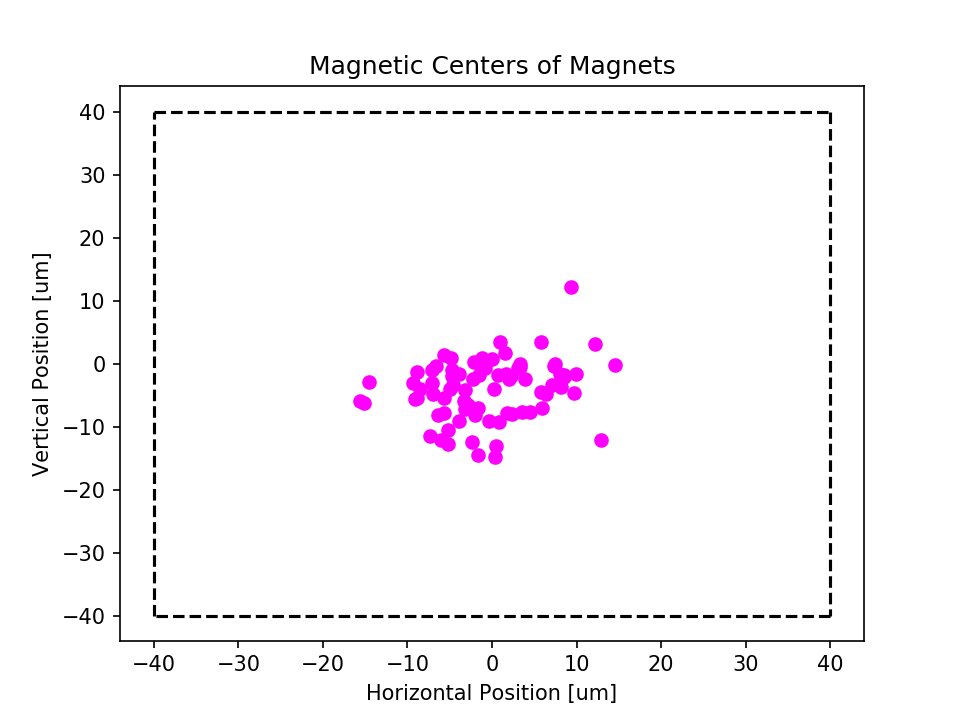

In [7]:
# Transverse plane positions

tmpl = data[serials[0]]
xv, yv = [], []
for i in range(len(serials)):
    d = data[serials[i]]
    idx = d.get_max_current_index()
    x = d.get_magnetic_center_x('M1')
    y = d.get_magnetic_center_y('M1')
    xv.append(x[idx])
    yv.append(y[idx])

# plot
sx = tmpl.spec_magnetic_center_x
sy = tmpl.spec_magnetic_center_y
plt.plot([-sx,-sx],[-sy,sy], '--k')
plt.plot([-sx,sx],[sy,sy], '--k')
plt.plot([sx,sx],[sy,-sy], '--k')
plt.plot([sx,-sx],[-sy,-sy], '--k')
for x, y in zip(xv, yv):
    plt.plot([x], [y], 'o', color=[1,0,1])
plt.xlabel('Horizontal Position [um]')
plt.ylabel('Vertical Position [um]')
plt.title('Magnetic Centers of Magnets')
plt.show()
    


## Ramp Up

<IPython.core.display.Javascript object>


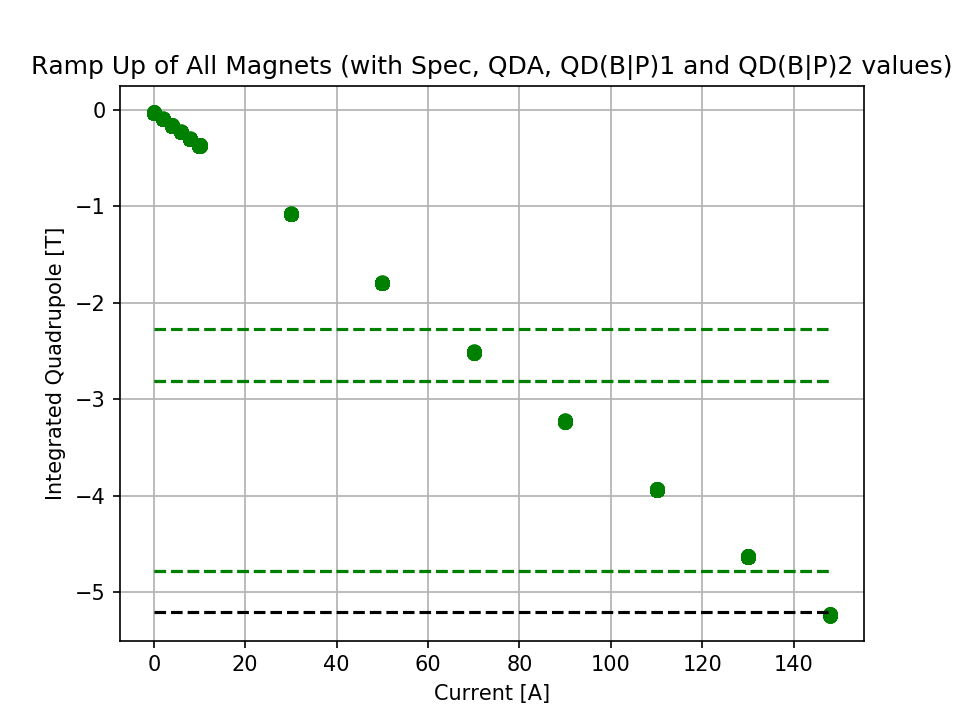

In [8]:
c_min, c_max = 1,1
tmpl = data[serials[0]]
for i in range(len(serials)):
    d = data[serials[i]]
    c, gl = d.get_rampup('M1')
    c_min, c_max = min(c_min, min(c)), max(c_max, max(c))
    plt.plot(c, gl, 'og')
    
y = (-tmpl.spec_main_intmpole_max_value, ) * 2
plt.plot([c_min, c_max], y, '--k')

nom = tmpl.get_nominal_main_intmpole_values(3.0)
for v in nom.values():
    plt.plot([c_min, c_max], [v, v], '--', color=[0,0.5,0])
    
plt.xlabel('Current [A]')
plt.ylabel('Integrated Quadrupole [T]')
plt.title('Ramp Up of All Magnets (with Spec, QDA, QD(B|P)1 and QD(B|P)2 values)')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


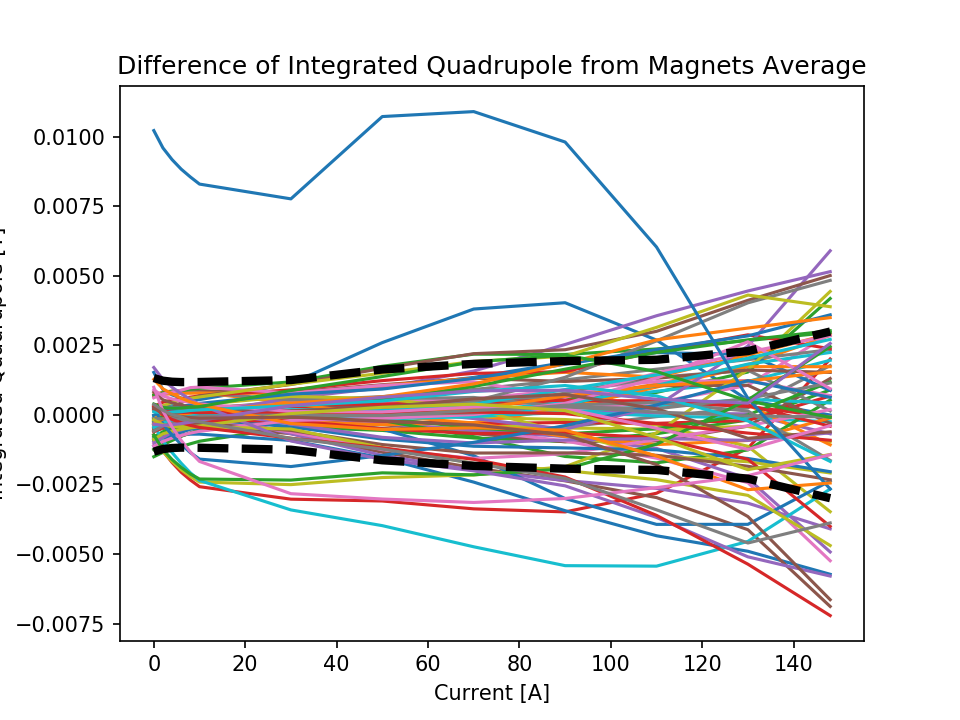

In [10]:
tmpl = data[serials[0]]

shape = (len(serials), 1+tmpl.get_max_current_index())
c, g = np.zeros(shape), np.zeros(shape)
for i in range(len(serials)):
    d = data[serials[i]]
    ct, gt = d.get_rampup('M1')
    c[i,:] = ct
    g[i,:] = gt


c_avg = np.mean(c, axis=0)
g_avg = np.mean(g, axis=0)
g_std = np.std(g, axis=0)

for i in range(len(serials)):
    d = data[serials[i]]
    gl_interp = d.rampup_interpolate('M1', c_avg)
    g_dif = gl_interp - g_avg
    plt.plot(c_avg, g_dif)
plt.plot(c_avg, +g_std, '--k', linewidth=4)
plt.plot(c_avg, -g_std, '--k', linewidth=4)

plt.xlabel('Current [A]')
plt.ylabel('Integrated Quadrupole [T]')
plt.title('Difference of Integrated Quadrupole from Magnets Average')
plt.show()

In [11]:
# Random Integrated Quadrupole Errors

tmpl = data[serials[0]]

def get_gl_set(current_index):
    c, g = [], []
    for sn in data:
        m = data[sn]
        ct, gt = m.get_rampup('M1')
        c.append(ct[current_index])
        g.append(gt[current_index])
    g_avg = np.mean(g)
    g_std = np.std(g)
    return g_avg, g_std, c, g


currents, _ = tmpl.get_rampup('M1')
errors, cs, gs = [], [], []
for i in range(len(currents)):
    g_avg, g_std, c, g = get_gl_set(i)
    error = [100*(gv - g_avg)/g_avg for gv in g]
    fmtstr = 'current: {:+8.3f} [A], rms_error: {:7.4f} [%], max_error: {:7.4f} [%]'
    print(fmtstr.format(np.mean(c), abs(100*g_std/g_avg), max(np.abs(error))))
    errors.append(error)
    cs.append(c)
    gs.append(g)

current:   +0.000 [A], rms_error:  4.7043 [%], max_error: 36.3641 [%]
current:   +1.995 [A], rms_error:  1.2981 [%], max_error: 10.1395 [%]
current:   +3.998 [A], rms_error:  0.7322 [%], max_error:  5.6371 [%]
current:   +5.997 [A], rms_error:  0.5096 [%], max_error:  3.8196 [%]
current:   +7.996 [A], rms_error:  0.3924 [%], max_error:  2.8463 [%]
current:   +9.996 [A], rms_error:  0.3198 [%], max_error:  2.2441 [%]
current:  +29.996 [A], rms_error:  0.1161 [%], max_error:  0.7191 [%]
current:  +49.994 [A], rms_error:  0.0909 [%], max_error:  0.5963 [%]
current:  +69.994 [A], rms_error:  0.0729 [%], max_error:  0.4328 [%]
current:  +89.997 [A], rms_error:  0.0599 [%], max_error:  0.3030 [%]
current: +109.997 [A], rms_error:  0.0503 [%], max_error:  0.1527 [%]
current: +129.997 [A], rms_error:  0.0495 [%], max_error:  0.1153 [%]
current: +147.996 [A], rms_error:  0.0572 [%], max_error:  0.1378 [%]


<IPython.core.display.Javascript object>


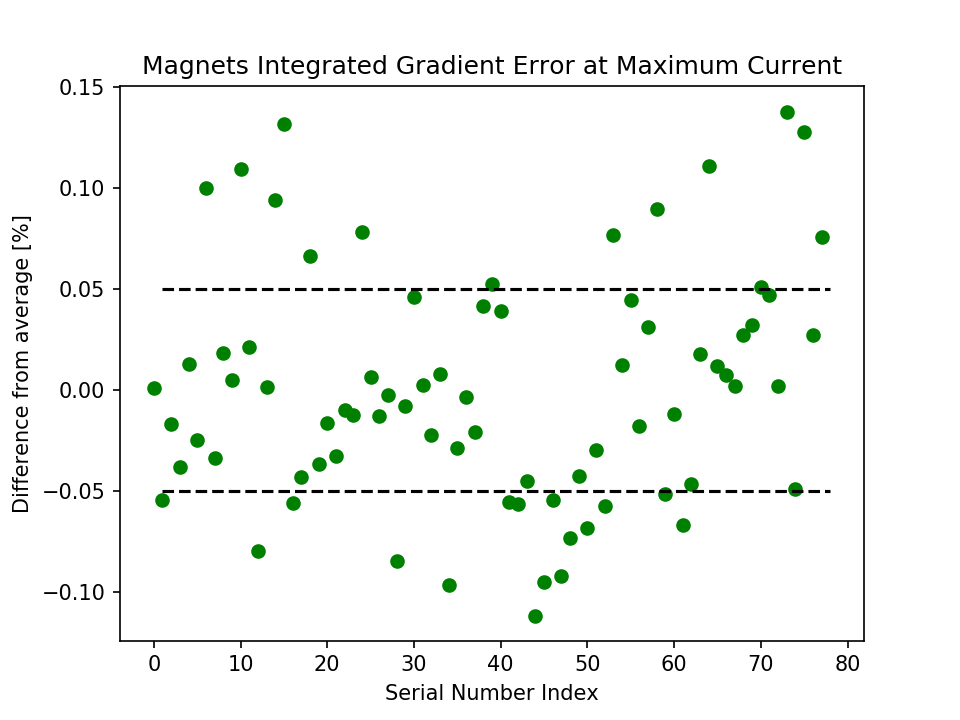

In [12]:
# Plot Integrated Quadrupole Error for maximum current

dat = errors[-1]
spec_rms = tmpl.spec_main_intmpole_rms_error
avg, std = np.mean(dat), np.std(dat)
plt.plot(dat, 'og')
plt.plot((1,len(dat)), (spec_rms, spec_rms), '--k')
plt.plot((1,len(dat)), (-spec_rms, -spec_rms), '--k')
#lt.xticks(range(len(serial_numbers)), serial_numbers, rotation='vertical')
plt.title('Magnets Integrated Gradient Error at Maximum Current')
plt.xlabel('Serial Number Index')
plt.ylabel('Difference from average [%]')
plt.show()

## Hysteresis

<IPython.core.display.Javascript object>


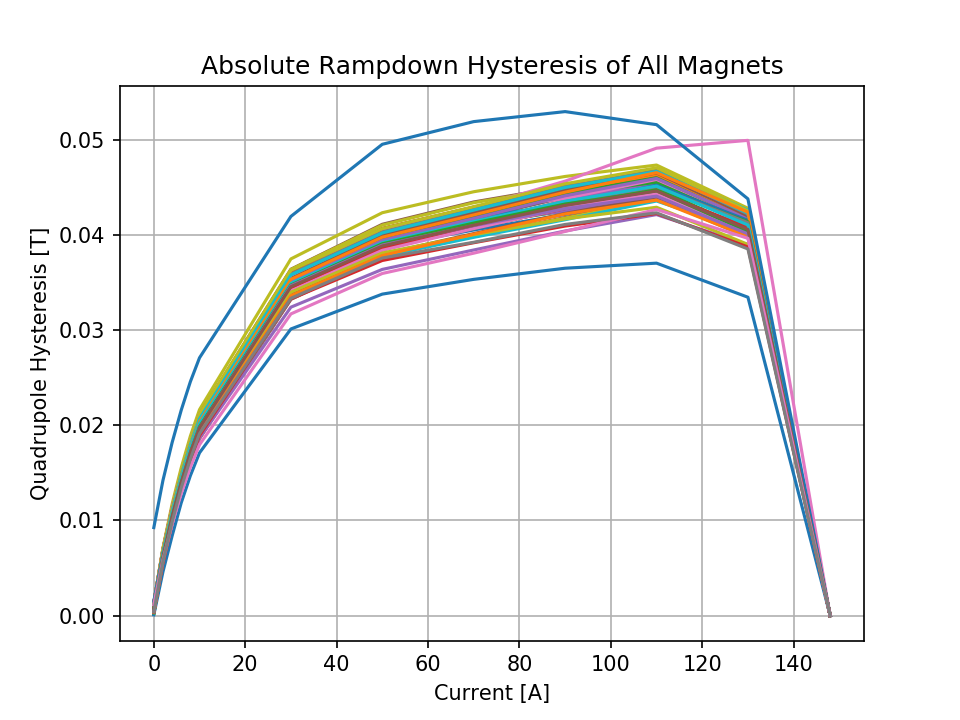

In [13]:
# Absolute

for i in range(len(serials)):
    d = data[serials[i]]
    gl, c, h, area = d.get_rampdown_hysteresis('M1')
    plt.plot(c, h)
plt.title('Absolute Rampdown Hysteresis of All Magnets')
plt.xlabel('Current [A]')
plt.ylabel('Quadrupole Hysteresis [T]')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


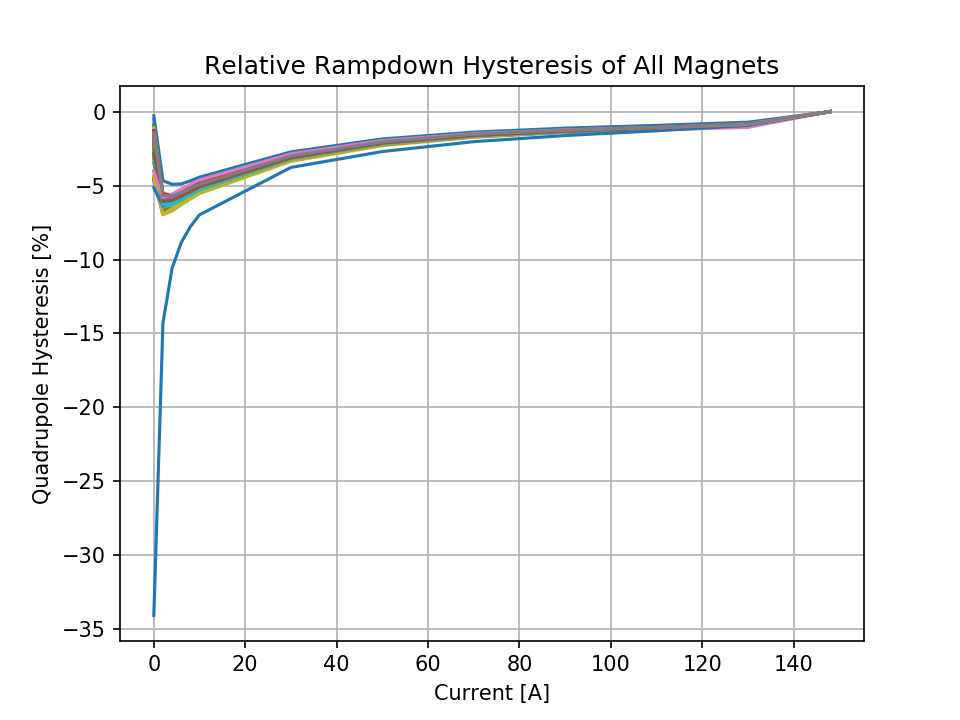

In [14]:
# Absolute

for i in range(len(serials)):
    d = data[serials[i]]
    gl, c, h, area = d.get_rampdown_hysteresis('M1')
    r = [100*h[i]/gl[i] for i in range(len(h))]
    plt.plot(c, r)
plt.title('Relative Rampdown Hysteresis of All Magnets')
plt.xlabel('Current [A]')
plt.ylabel('Quadrupole Hysteresis [%]')
plt.grid()
plt.show()